In [1]:
%matplotlib notebook
from ipywidgets import *
import matplotlib.pyplot as plt
import matplotlib.dates
import datetime
import numpy as np

from matplotlib.widgets import Button, Slider


In [ ]:
# test function for slider manipulation
def read_text_vals_and_scale(fn, scale):
    data = []
    f = open(fn, 'r')
    lines = f.readlines()
    for line in lines:
        data.append(float(line)) 
    f.close()
    datanp = np.array(data)
    datanp = datanp *  scale
    return datanp

In [2]:
def read_text_vals(fn):
    data = []
    f = open(fn, 'r')
    lines = f.readlines()
    for line in lines:
        data.append(float(line)) 
    f.close()
    return data

In [3]:
def iir_filter(data, filter_coeff):
    filter_curr = 0
    filter_vals = []
    for i in range(len(data)):
        new_val = float(data[i]) * (filter_coeff) + filter_curr * (1- filter_coeff)
        filter_vals.append(new_val)
        filter_curr = new_val
    return filter_vals[100:]
    

<IPython.core.display.Javascript object>


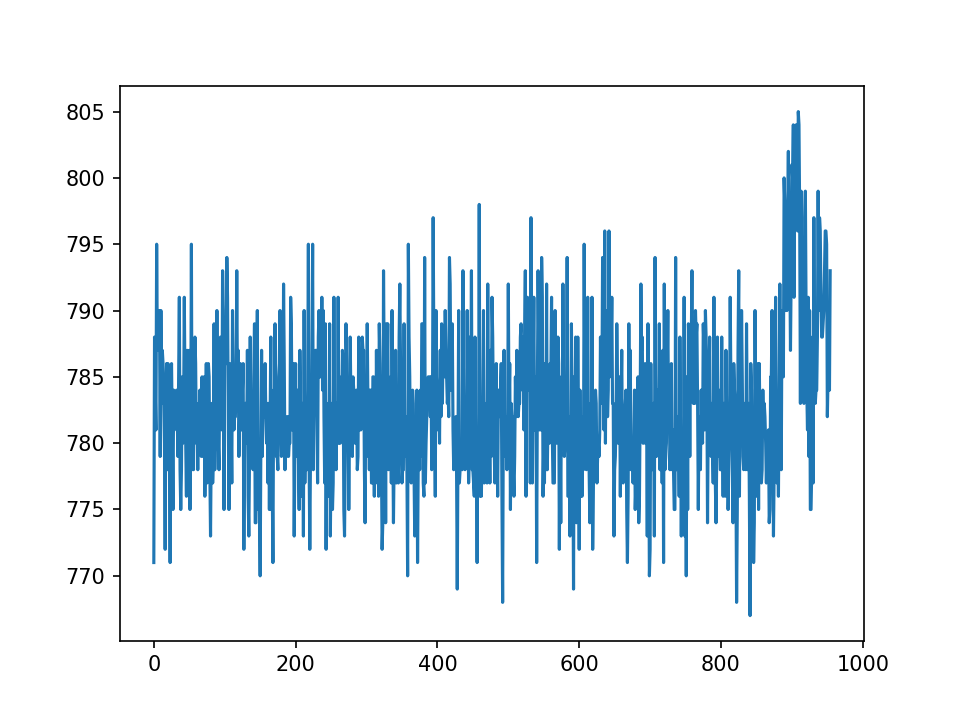

782.7549738219896
28.78289903503758
38.41673595343088
41.06780937117718
25.583336158862156


In [13]:
noise_amp = read_text_vals('noise.txt')
plt.plot(noise_amp)
print(np.mean(noise_amp))
data = read_text_vals("amp_0mm_square_BL32.txt")
print(20 * np.log10(np.mean(data)/np.mean(noise_amp)))
noise_noamp = read_text_vals('noamp_noise.txt')
data = read_text_vals("0mm_square_BL32.txt")
print(20 * np.log10(np.mean(data)/np.mean(noise_noamp)))
noise_noamp = read_text_vals('noamp_noise_interdigitated.txt')
data = read_text_vals("r2_0mm_noamp_Flat_interdigitated_BL32.txt")
print(20 * np.log10(np.mean(data)/np.mean(noise_noamp)))
noise_noamp = read_text_vals('noise_interdigitated.txt')
data = read_text_vals("r2_0mm_Flat_interdigitated_BL32.txt")
print(20 * np.log10(np.mean(data)/np.mean(noise_noamp)))

<IPython.core.display.Javascript object>


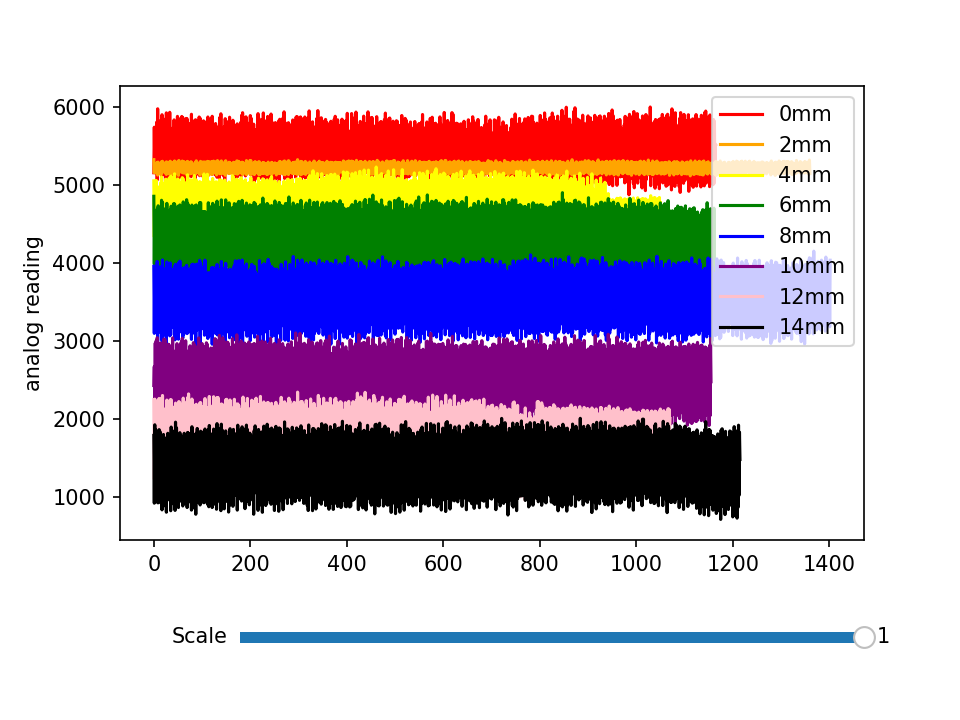

1266
1266


In [4]:
init_coeff = 1;
fig, ax = plt.subplots()
data = read_text_vals("0mm_square_BL32.txt")
data2 = read_text_vals('2mm_square_BL32.txt')
data3 = read_text_vals('4mm_square_BL32.txt')
data4 = read_text_vals('6mm_square_BL32.txt')
data5 = read_text_vals('8mm_square_BL32.txt')
data6 = read_text_vals('10mm_square_BL32.txt')
data7 = read_text_vals('12mm_square_BL32.txt')
data8 = read_text_vals('14mm_square_BL32.txt')
print(len(data))
# data = data[100:]
# data2 = data2[100:]
# data3 = data3[100:]
# data4 = data4[100:]
# data5 = data5[100:]
# data6 = data6[100:]
# data7 = data7[100:]
# data8 = data8[100:]
print(len(data))
line, = ax.plot(iir_filter(data, 1), 'red', label='0mm')
line2, = ax.plot(iir_filter(data2, 1), 'orange', label='2mm')
line3, = ax.plot(iir_filter(data3, 1), 'yellow', label='4mm')
line4, = ax.plot(iir_filter(data4, 1), 'green', label='6mm')
line5, = ax.plot(iir_filter(data5, 1), 'blue', label='8mm')
line6, = ax.plot(iir_filter(data6, 1), 'purple', label='10mm')
line7, = ax.plot(iir_filter(data7, 1), 'pink', label='12mm')
line8, = ax.plot(iir_filter(data8, 1), 'black', label='14mm')
plt.legend(loc="upper right")
plt.ylabel('analog reading')
# adjust the main plot to make room for the sliders
fig.subplots_adjust(bottom=0.25)
# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
amp_slider = Slider(
    ax=axfreq,
    label='Scale',
    valmin=0,
    valmax=1,
    valinit=init_coeff,
)

# The function to be called anytime a slider's value changes
def update(val=1):
    line.set_ydata(iir_filter(data, val))
    line2.set_ydata(iir_filter(data2, val))
    line3.set_ydata(iir_filter(data3, val))
    line4.set_ydata(iir_filter(data4, val))
    line5.set_ydata(iir_filter(data5, val))
    line6.set_ydata(iir_filter(data6, val))
    line7.set_ydata(iir_filter(data7, val))
    line8.set_ydata(iir_filter(data8, val))
    fig.canvas.draw_idle()

# register the update function with each slider
amp_slider.on_changed(update)
interact()

<IPython.core.display.Javascript object>


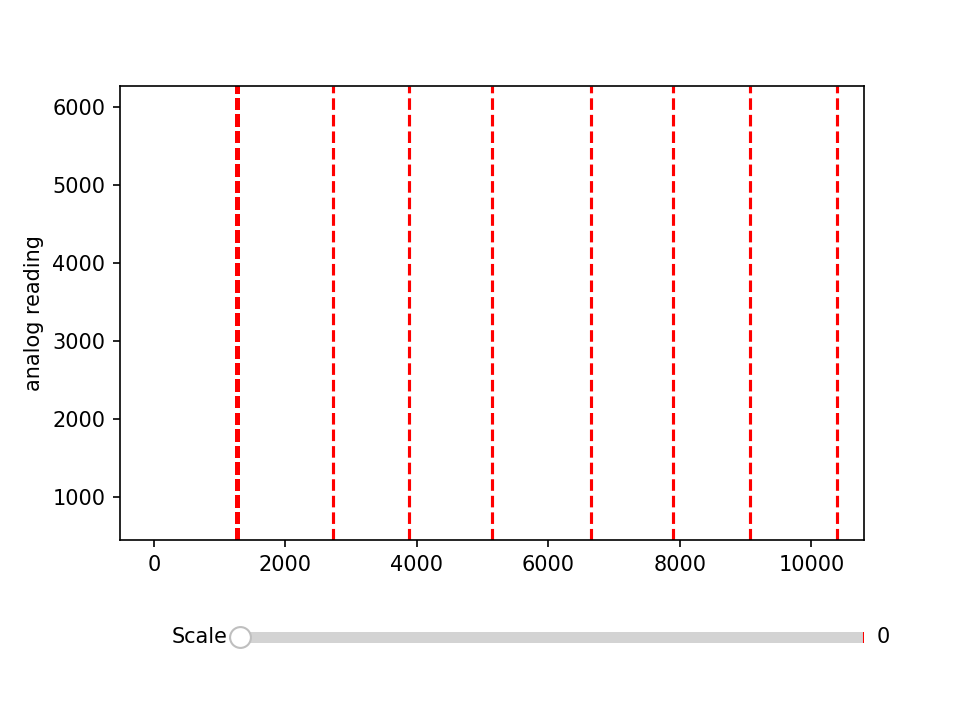

In [5]:
init_coeff = 1;
fig, ax = plt.subplots()
# print(len(data))
# data = data[100:]
# data2 = data2[100:]
# data3 = data3[100:]
# data4 = data4[100:]
# data5 = data5[100:]
# data6 = data6[100:]
# data7 = data7[100:]
# data8 = data8[100:]
# print(len(data))
data1 = len(data)
data_total = np.array(data)
data_total = np.concatenate((data_total, data2))
data_total = np.concatenate((data_total, data3))
data_total = np.concatenate((data_total, data4))
data_total = np.concatenate((data_total, data5))
data_total = np.concatenate((data_total, data6))
data_total = np.concatenate((data_total, data7))
data_total = np.concatenate((data_total, data8))
line, = ax.plot(iir_filter(data_total, 1))
plt.ylabel('analog reading')
# line2, = ax.plot(iir_filter(data2, 1), 'orange')
# line3, = ax.plot(iir_filter(data3, 1), 'yellow')
# line4, = ax.plot(iir_filter(data4, 1), 'green')
# line5, = ax.plot(iir_filter(data5, 1), 'blue')
# line6, = ax.plot(iir_filter(data6, 1), 'purple')
# line7, = ax.plot(iir_filter(data7, 1), 'pink')
# line8, = ax.plot(iir_filter(data8, 1), 'black')
# adjust the main plot to make room for the sliders
fig.subplots_adjust(bottom=0.25)
# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
amp_slider = Slider(
    ax=axfreq,
    label='Scale',
    valmin=0,
    valmax=1,
    valinit=init_coeff,
)
len_total = len(data)
ax.axvline(x=len(data)-1, color='red', linestyle='--')
len_total += len(data2)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
len_total += len(data3)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
len_total += len(data4)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
len_total += len(data5)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
len_total += len(data6)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
len_total += len(data7)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
len_total += len(data8)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
# The function to be called anytime a slider's value changes
def update(val=1):
    line.set_ydata(iir_filter(data_total, val))
    ax.axvline(x=len(data), color='red', linestyle='--')

# register the update function with each slider
amp_slider.on_changed(update)

interact()

<IPython.core.display.Javascript object>


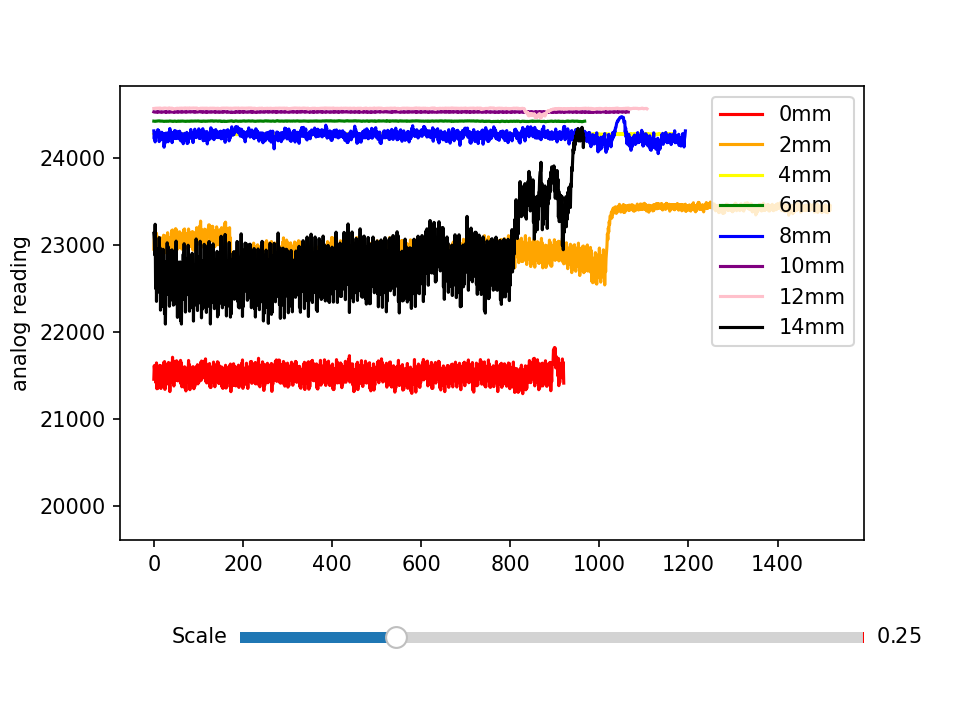

1021
1021


In [7]:
init_coeff = 1;
fig, ax = plt.subplots()
data = read_text_vals("amp_0mm_square_BL32.txt")
data2 = read_text_vals('amp_2mm_square_BL32.txt')
data3 = read_text_vals('amp_4mm_square_BL32.txt')
data4 = read_text_vals('amp_6mm_square_BL32.txt')
data5 = read_text_vals('amp_8mm_square_BL32.txt')
data6 = read_text_vals('amp_10mm_square_BL32.txt')
data7 = read_text_vals('amp_12mm_square_BL32.txt')
data8 = read_text_vals('amp_14mm_square_BL32.txt')
print(len(data))
# data = data[100:]
# data2 = data2[100:]
# data3 = data3[100:]
# data4 = data4[100:]
# data5 = data5[100:]
# data6 = data6[100:]
# data7 = data7[100:]
# data8 = data8[100:]
print(len(data))
line, = ax.plot(iir_filter(data, 1), 'red', label='0mm')
line2, = ax.plot(iir_filter(data2, 1), 'orange', label='2mm')
line3, = ax.plot(iir_filter(data3, 1), 'yellow', label='4mm')
line4, = ax.plot(iir_filter(data4, 1), 'green', label='6mm')
line5, = ax.plot(iir_filter(data5, 1), 'blue', label='8mm')
line6, = ax.plot(iir_filter(data6, 1), 'purple', label='10mm')
line7, = ax.plot(iir_filter(data7, 1), 'pink', label='12mm')
line8, = ax.plot(iir_filter(data8, 1), 'black', label='14mm')
plt.legend(loc="upper right")
plt.ylabel('analog reading')
# adjust the main plot to make room for the sliders
fig.subplots_adjust(bottom=0.25)
# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
amp_slider = Slider(
    ax=axfreq,
    label='Scale',
    valmin=0,
    valmax=1,
    valinit=init_coeff,
)

# The function to be called anytime a slider's value changes
def update(val=1):
    line.set_ydata(iir_filter(data, val))
    line2.set_ydata(iir_filter(data2, val))
    line3.set_ydata(iir_filter(data3, val))
    line4.set_ydata(iir_filter(data4, val))
    line5.set_ydata(iir_filter(data5, val))
    line6.set_ydata(iir_filter(data6, val))
    line7.set_ydata(iir_filter(data7, val))
    line8.set_ydata(iir_filter(data8, val))
    fig.canvas.draw_idle()

# register the update function with each slider
amp_slider.on_changed(update)
interact()

<IPython.core.display.Javascript object>


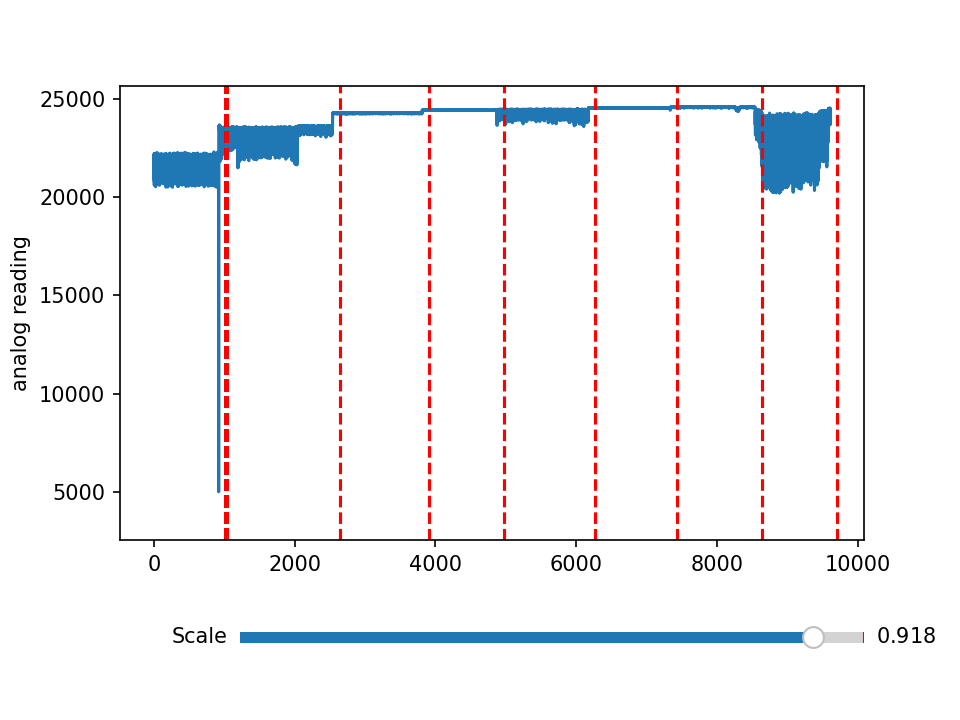

In [8]:
init_coeff = 1;
fig, ax = plt.subplots()
# print(len(data))
# data = data[100:]
# data2 = data2[100:]
# data3 = data3[100:]
# data4 = data4[100:]
# data5 = data5[100:]
# data6 = data6[100:]
# data7 = data7[100:]
# data8 = data8[100:]
# print(len(data))
data1 = len(data)
data_total = np.array(data)
data_total = np.concatenate((data_total, data2))
data_total = np.concatenate((data_total, data3))
data_total = np.concatenate((data_total, data4))
data_total = np.concatenate((data_total, data5))
data_total = np.concatenate((data_total, data6))
data_total = np.concatenate((data_total, data7))
data_total = np.concatenate((data_total, data8))
line, = ax.plot(iir_filter(data_total, 1))
plt.ylabel('analog reading')
# line2, = ax.plot(iir_filter(data2, 1), 'orange')
# line3, = ax.plot(iir_filter(data3, 1), 'yellow')
# line4, = ax.plot(iir_filter(data4, 1), 'green')
# line5, = ax.plot(iir_filter(data5, 1), 'blue')
# line6, = ax.plot(iir_filter(data6, 1), 'purple')
# line7, = ax.plot(iir_filter(data7, 1), 'pink')
# line8, = ax.plot(iir_filter(data8, 1), 'black')
# adjust the main plot to make room for the sliders
fig.subplots_adjust(bottom=0.25)
# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
amp_slider = Slider(
    ax=axfreq,
    label='Scale',
    valmin=0,
    valmax=1,
    valinit=init_coeff,
)
len_total = len(data)
ax.axvline(x=len(data)-1, color='red', linestyle='--')
len_total += len(data2)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
len_total += len(data3)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
len_total += len(data4)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
len_total += len(data5)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
len_total += len(data6)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
len_total += len(data7)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
len_total += len(data8)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
# The function to be called anytime a slider's value changes
def update(val=1):
    line.set_ydata(iir_filter(data_total, val))
    ax.axvline(x=len(data), color='red', linestyle='--')

# register the update function with each slider
amp_slider.on_changed(update)

interact()

In [ ]:
init_coeff = 1;
fig, ax = plt.subplots()
data = read_text_vals("r2_0mm_noamp_Flat_interdigitated_BL32.txt")
data2 = read_text_vals("r2_2mm_noamp_Flat_interdigitated_BL32.txt")
data3 = read_text_vals("r2_4mm_noamp_Flat_interdigitated_BL32.txt")
data4 = read_text_vals("r2_6mm_noamp_Flat_interdigitated_BL32.txt")
data5 = read_text_vals("r2_8mm_noamp_Flat_interdigitated_BL32.txt")
data6 = read_text_vals("r2_10mm_noamp_Flat_interdigitated_BL32.txt")
data7 = read_text_vals("r2_12mm_noamp_Flat_interdigitated_BL32.txt")
data8 = read_text_vals("r2_14mm_noamp_Flat_interdigitated_BL32.txt")
# print(len(data))
# data = data[100:]
# data2 = data2[100:]
# data3 = data3[100:]
# data4 = data4[100:]
# data5 = data5[100:]
# data6 = data6[100:]
# data7 = data7[100:]
# data8 = data8[100:]
# print(len(data))
data1 = len(data)
data_total = np.array(data)
data_total = np.concatenate((data_total, data2))
data_total = np.concatenate((data_total, data3))
data_total = np.concatenate((data_total, data4))
data_total = np.concatenate((data_total, data5))
data_total = np.concatenate((data_total, data6))
data_total = np.concatenate((data_total, data7))
data_total = np.concatenate((data_total, data8))
line, = ax.plot(iir_filter(data_total, 1))
plt.ylabel('analog reading')
# line2, = ax.plot(iir_filter(data2, 1), 'orange')
# line3, = ax.plot(iir_filter(data3, 1), 'yellow')
# line4, = ax.plot(iir_filter(data4, 1), 'green')
# line5, = ax.plot(iir_filter(data5, 1), 'blue')
# line6, = ax.plot(iir_filter(data6, 1), 'purple')
# line7, = ax.plot(iir_filter(data7, 1), 'pink')
# line8, = ax.plot(iir_filter(data8, 1), 'black')
# adjust the main plot to make room for the sliders
fig.subplots_adjust(bottom=0.25)
# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
amp_slider = Slider(
    ax=axfreq,
    label='Scale',
    valmin=0,
    valmax=1,
    valinit=init_coeff,
)
len_total = len(data)
ax.axvline(x=len(data)-1, color='red', linestyle='--')
len_total += len(data2)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
len_total += len(data3)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
len_total += len(data4)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
len_total += len(data5)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
len_total += len(data6)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
len_total += len(data7)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
len_total += len(data8)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
# The function to be called anytime a slider's value changes
def update(val=1):
    line.set_ydata(iir_filter(data_total, val))
    ax.axvline(x=len(data), color='red', linestyle='--')

# register the update function with each slider
amp_slider.on_changed(update)

interact()

In [ ]:
init_coeff = 1;
fig, ax = plt.subplots()
print(len(data))
# data = data[100:]
# data2 = data2[100:]
# data3 = data3[100:]
# data4 = data4[100:]
# data5 = data5[100:]
# data6 = data6[100:]
# data7 = data7[100:]
# data8 = data8[100:]
print(len(data))
line, = ax.plot(iir_filter(data, 1), 'red', label='0mm')
line2, = ax.plot(iir_filter(data2, 1), 'orange', label='2mm')
line3, = ax.plot(iir_filter(data3, 1), 'yellow', label='4mm')
line4, = ax.plot(iir_filter(data4, 1), 'green', label='6mm')
line5, = ax.plot(iir_filter(data5, 1), 'blue', label='8mm')
line6, = ax.plot(iir_filter(data6, 1), 'purple', label='10mm')
line7, = ax.plot(iir_filter(data7, 1), 'pink', label='12mm')
line8, = ax.plot(iir_filter(data8, 1), 'black', label='14mm')
plt.legend(loc="upper right")
plt.ylabel('analog reading')
# adjust the main plot to make room for the sliders
fig.subplots_adjust(bottom=0.25)
# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
amp_slider = Slider(
    ax=axfreq,
    label='Scale',
    valmin=0,
    valmax=1,
    valinit=init_coeff,
)

# The function to be called anytime a slider's value changes
def update(val=1):
    line.set_ydata(iir_filter(data, val))
    line2.set_ydata(iir_filter(data2, val))
    line3.set_ydata(iir_filter(data3, val))
    line4.set_ydata(iir_filter(data4, val))
    line5.set_ydata(iir_filter(data5, val))
    line6.set_ydata(iir_filter(data6, val))
    line7.set_ydata(iir_filter(data7, val))
    line8.set_ydata(iir_filter(data8, val))
    fig.canvas.draw_idle()

# register the update function with each slider
amp_slider.on_changed(update)
interact()

In [ ]:
init_coeff = 1;
fig, ax = plt.subplots()
data = read_text_vals("noamp_Flat_interdigitated_BL32.txt")
data2 = read_text_vals("2mm_noamp_Flat_interdigitated_BL32.txt")
data3 = read_text_vals("4mm_noamp_Flat_interdigitated_BL32.txt")
data4 = read_text_vals("6mm_noamp_Flat_interdigitated_BL32.txt")
data5 = read_text_vals("8mm_noamp_Flat_interdigitated_BL32.txt")
data6 = read_text_vals("10mm_noamp_Flat_interdigitated_BL32.txt")
data7 = read_text_vals("12mm_noamp_Flat_interdigitated_BL32.txt")
data8 = read_text_vals("14mm_noamp_Flat_interdigitated_BL32.txt")
print(len(data))
# data = data[100:]
# data2 = data2[100:]
# data3 = data3[100:]
# data4 = data4[100:]
# data5 = data5[100:]
# data6 = data6[100:]
# data7 = data7[100:]
# data8 = data8[100:]
print(len(data))
line, = ax.plot(iir_filter(data, 1), 'red', label='0mm')
line2, = ax.plot(iir_filter(data2, 1), 'orange',  label='2mm')
line3, = ax.plot(iir_filter(data3, 1), 'yellow',  label='4mm')
line4, = ax.plot(iir_filter(data4, 1), 'green',  label='6mm')
line5, = ax.plot(iir_filter(data5, 1), 'blue',  label='8mm')
line6, = ax.plot(iir_filter(data6, 1), 'purple', label='10mm')
line7, = ax.plot(iir_filter(data7, 1), 'pink',  label='12mm')
line8, = ax.plot(iir_filter(data8, 1), 'black',  label='14mm')
plt.legend(loc="upper right")
# adjust the main plot to make room for the sliders
fig.subplots_adjust(bottom=0.25)
# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
amp_slider = Slider(
    ax=axfreq,
    label='Scale',
    valmin=0,
    valmax=1,
    valinit=init_coeff,
)

# The function to be called anytime a slider's value changes
def update(val=1):
    line.set_ydata(iir_filter(data, val))
    line2.set_ydata(iir_filter(data2, val))
    line3.set_ydata(iir_filter(data3, val))
    line4.set_ydata(iir_filter(data4, val))
    line5.set_ydata(iir_filter(data5, val))
    line6.set_ydata(iir_filter(data6, val))
    line7.set_ydata(iir_filter(data7, val))
    line8.set_ydata(iir_filter(data8, val))
    fig.canvas.draw_idle()

# register the update function with each slider
amp_slider.on_changed(update)
interact()

<IPython.core.display.Javascript object>


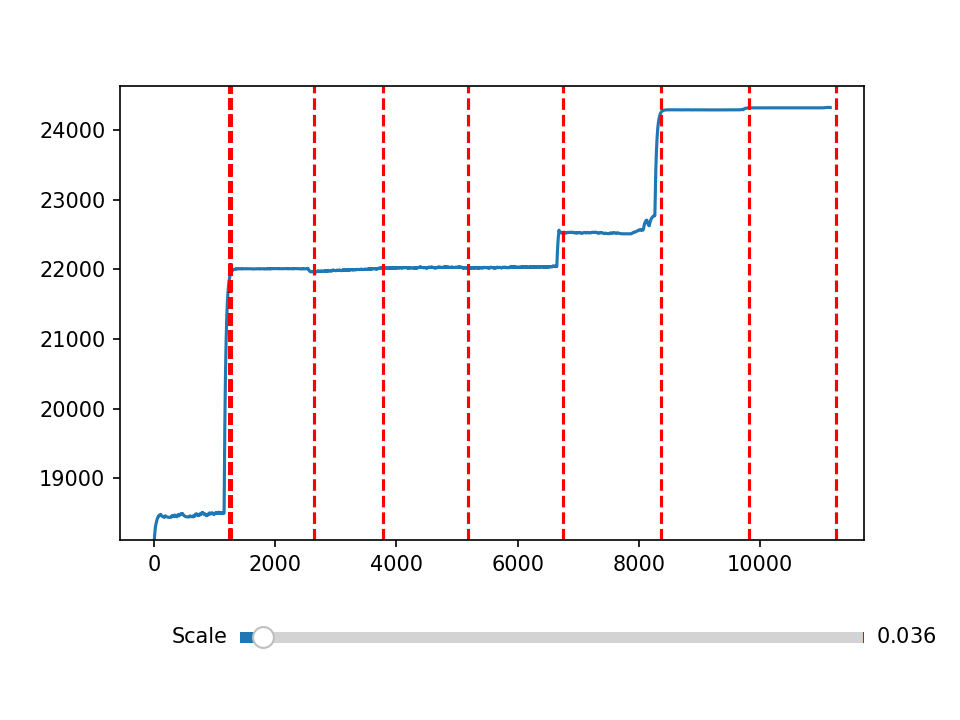

In [15]:
init_coeff = 1;
fig, ax = plt.subplots()
data = read_text_vals("r3_0mm_Flat_interdigitated_BL32.txt")
data2 = read_text_vals("r3_2mm_Flat_interdigitated_BL32.txt")
data3 = read_text_vals("r3_4mm_Flat_interdigitated_BL32.txt")
data4 = read_text_vals("r3_6mm_Flat_interdigitated_BL32.txt")
data5 = read_text_vals("r3_8mm_Flat_interdigitated_BL32.txt")
data6 = read_text_vals("r3_10mm_Flat_interdigitated_BL32.txt")
data7 = read_text_vals("r3_12mm_Flat_interdigitated_BL32.txt")
data8 = read_text_vals("r3_14mm_Flat_interdigitated_BL32.txt")
# print(len(data))
# data = data[100:]
# data2 = data2[100:]
# data3 = data3[100:]
# data4 = data4[100:]
# data5 = data5[100:]
# data6 = data6[100:]
# data7 = data7[100:]
# data8 = data8[100:]
# print(len(data))
data1 = len(data)
data_total = np.array(data)
data_total = np.concatenate((data_total, data2))
data_total = np.concatenate((data_total, data3))
data_total = np.concatenate((data_total, data4))
data_total = np.concatenate((data_total, data5))
data_total = np.concatenate((data_total, data6))
data_total = np.concatenate((data_total, data7))
data_total = np.concatenate((data_total, data8))
line, = ax.plot(iir_filter(data_total, 1))
# line2, = ax.plot(iir_filter(data2, 1), 'orange')
# line3, = ax.plot(iir_filter(data3, 1), 'yellow')
# line4, = ax.plot(iir_filter(data4, 1), 'green')
# line5, = ax.plot(iir_filter(data5, 1), 'blue')
# line6, = ax.plot(iir_filter(data6, 1), 'purple')
# line7, = ax.plot(iir_filter(data7, 1), 'pink')
# line8, = ax.plot(iir_filter(data8, 1), 'black')
# adjust the main plot to make room for the sliders
fig.subplots_adjust(bottom=0.25)
# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
amp_slider = Slider(
    ax=axfreq,
    label='Scale',
    valmin=0,
    valmax=1,
    valinit=init_coeff,
)
len_total = len(data)
ax.axvline(x=len(data)-1, color='red', linestyle='--')
len_total += len(data2)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
len_total += len(data3)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
len_total += len(data4)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
len_total += len(data5)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
len_total += len(data6)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
len_total += len(data7)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
len_total += len(data8)
ax.axvline(x=len_total - 1, color='red', linestyle='--')
# The function to be called anytime a slider's value changes
def update(val=1):
    line.set_ydata(iir_filter(data_total, val))
    ax.axvline(x=len(data), color='red', linestyle='--')

# register the update function with each slider
amp_slider.on_changed(update)

interact()

<IPython.core.display.Javascript object>


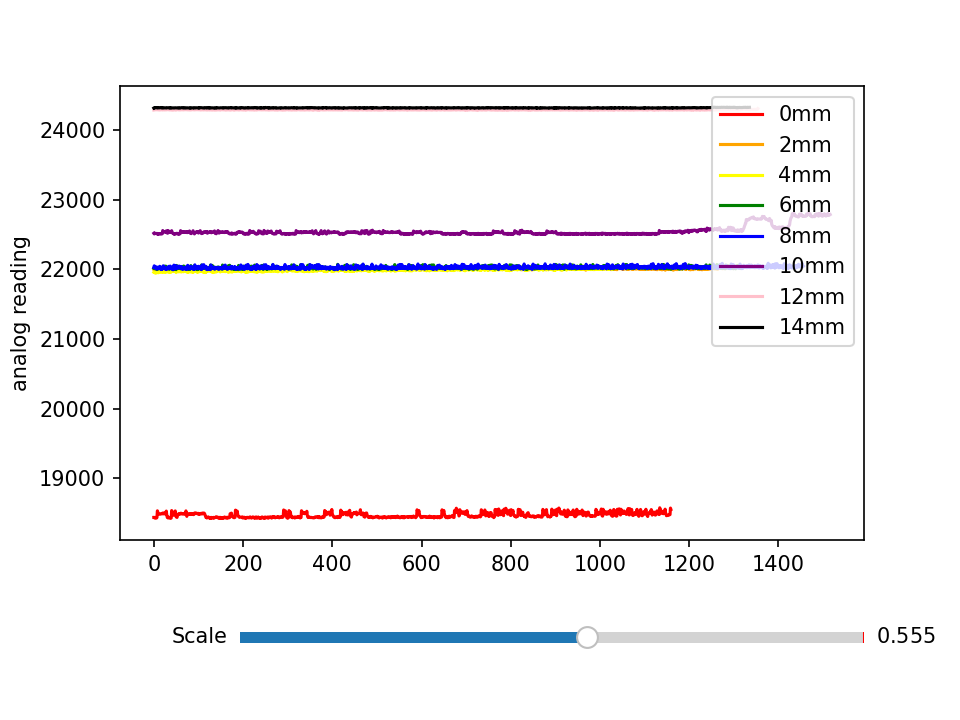

1260
1260


In [14]:
init_coeff = 1;
fig, ax = plt.subplots()
data = read_text_vals("r3_0mm_Flat_interdigitated_BL32.txt")
data2 = read_text_vals("r3_2mm_Flat_interdigitated_BL32.txt")
data3 = read_text_vals("r3_4mm_Flat_interdigitated_BL32.txt")
data4 = read_text_vals("r3_6mm_Flat_interdigitated_BL32.txt")
data5 = read_text_vals("r3_8mm_Flat_interdigitated_BL32.txt")
data6 = read_text_vals("r3_10mm_Flat_interdigitated_BL32.txt")
data7 = read_text_vals("r3_12mm_Flat_interdigitated_BL32.txt")
data8 = read_text_vals("r3_14mm_Flat_interdigitated_BL32.txt")
print(len(data))
# data = data[100:]
# data2 = data2[100:]
# data3 = data3[100:]
# data4 = data4[100:]
# data5 = data5[100:]
# data6 = data6[100:]
# data7 = data7[100:]
# data8 = data8[100:]
print(len(data))
line, = ax.plot(iir_filter(data, 1), 'red', label = '0mm')
line2, = ax.plot(iir_filter(data2, 1), 'orange', label = '2mm')
line3, = ax.plot(iir_filter(data3, 1), 'yellow', label='4mm')
line4, = ax.plot(iir_filter(data4, 1), 'green', label='6mm')
line5, = ax.plot(iir_filter(data5, 1), 'blue', label='8mm')
line6, = ax.plot(iir_filter(data6, 1), 'purple', label='10mm')
line7, = ax.plot(iir_filter(data7, 1), 'pink', label='12mm')
line8, = ax.plot(iir_filter(data8, 1), 'black', label='14mm')
# adjust the main plot to make room for the sliders
fig.subplots_adjust(bottom=0.25)
plt.legend(loc="upper right")
plt.ylabel('analog reading')
# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
amp_slider = Slider(
    ax=axfreq,
    label='Scale',
    valmin=0,
    valmax=1,
    valinit=init_coeff,
)

# The function to be called anytime a slider's value changes
def update(val=1):
    line.set_ydata(iir_filter(data, val))
    line2.set_ydata(iir_filter(data2, val))
    line3.set_ydata(iir_filter(data3, val))
    line4.set_ydata(iir_filter(data4, val))
    line5.set_ydata(iir_filter(data5, val))
    line6.set_ydata(iir_filter(data6, val))
    line7.set_ydata(iir_filter(data7, val))
    line8.set_ydata(iir_filter(data8, val))
    fig.canvas.draw_idle()

# register the update function with each slider
amp_slider.on_changed(update)
interact()

<IPython.core.display.Javascript object>


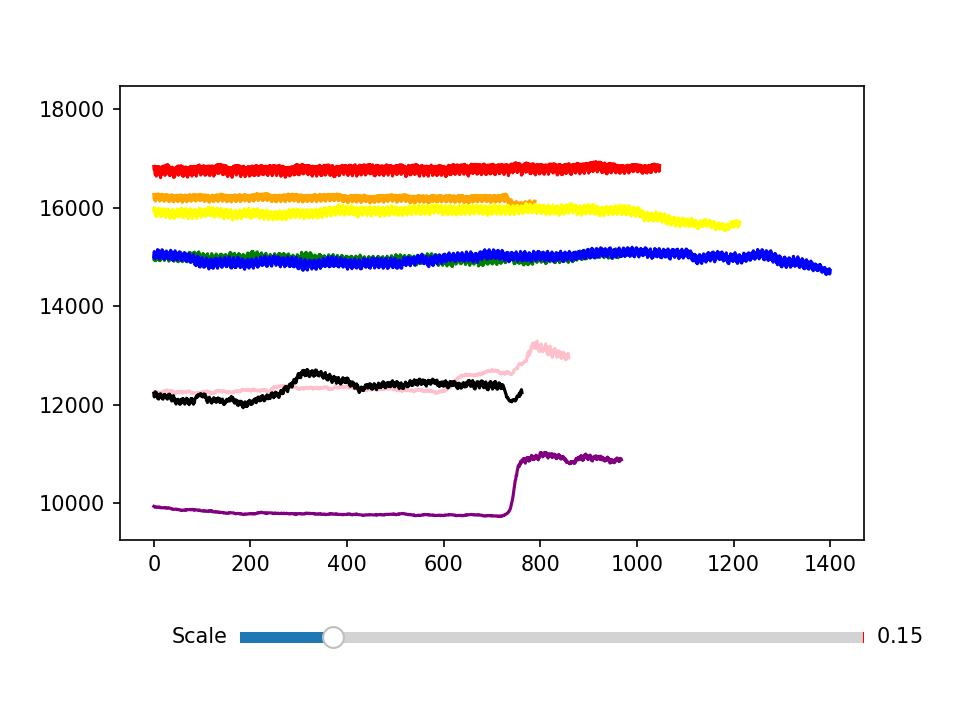

1248
1148


In [11]:
init_coeff = 1;
fig, ax = plt.subplots()
data = read_text_vals("r2_0mm_Flat_interdigitated_BL32.txt")
data2 = read_text_vals("r2_2mm_Flat_interdigitated_BL32.txt")
data3 = read_text_vals("r2_4mm_Flat_interdigitated_BL32.txt")
data4 = read_text_vals("r2_6mm_Flat_interdigitated_BL32.txt")
data5 = read_text_vals("r2_8mm_Flat_interdigitated_BL32.txt")
data6 = read_text_vals("r2_10mm_Flat_interdigitated_BL32.txt")
data7 = read_text_vals("r2_12mm_Flat_interdigitated_BL32.txt")
data8 = read_text_vals("r2_14mm_Flat_interdigitated_BL32.txt")
print(len(data))
data = data[100:]
data2 = data2[100:]
data3 = data3[100:]
data4 = data4[100:]
data5 = data5[100:]
data6 = data6[100:]
data7 = data7[100:]
data8 = data8[100:]
print(len(data))
line, = ax.plot(iir_filter(data, 1), 'red')
line2, = ax.plot(iir_filter(data2, 1), 'orange')
line3, = ax.plot(iir_filter(data3, 1), 'yellow')
line4, = ax.plot(iir_filter(data4, 1), 'green')
line5, = ax.plot(iir_filter(data5, 1), 'blue')
line6, = ax.plot(iir_filter(data6, 1), 'purple')
line7, = ax.plot(iir_filter(data7, 1), 'pink')
line8, = ax.plot(iir_filter(data8, 1), 'black')
# adjust the main plot to make room for the sliders
fig.subplots_adjust(bottom=0.25)
# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
amp_slider = Slider(
    ax=axfreq,
    label='Scale',
    valmin=0,
    valmax=1,
    valinit=init_coeff,
)

# The function to be called anytime a slider's value changes
def update(val=1):
    line.set_ydata(iir_filter(data, val))
    line2.set_ydata(iir_filter(data2, val))
    line3.set_ydata(iir_filter(data3, val))
    line4.set_ydata(iir_filter(data4, val))
    line5.set_ydata(iir_filter(data5, val))
    line6.set_ydata(iir_filter(data6, val))
    line7.set_ydata(iir_filter(data7, val))
    line8.set_ydata(iir_filter(data8, val))
    fig.canvas.draw_idle()

# register the update function with each slider
amp_slider.on_changed(update)
interact()

<IPython.core.display.Javascript object>


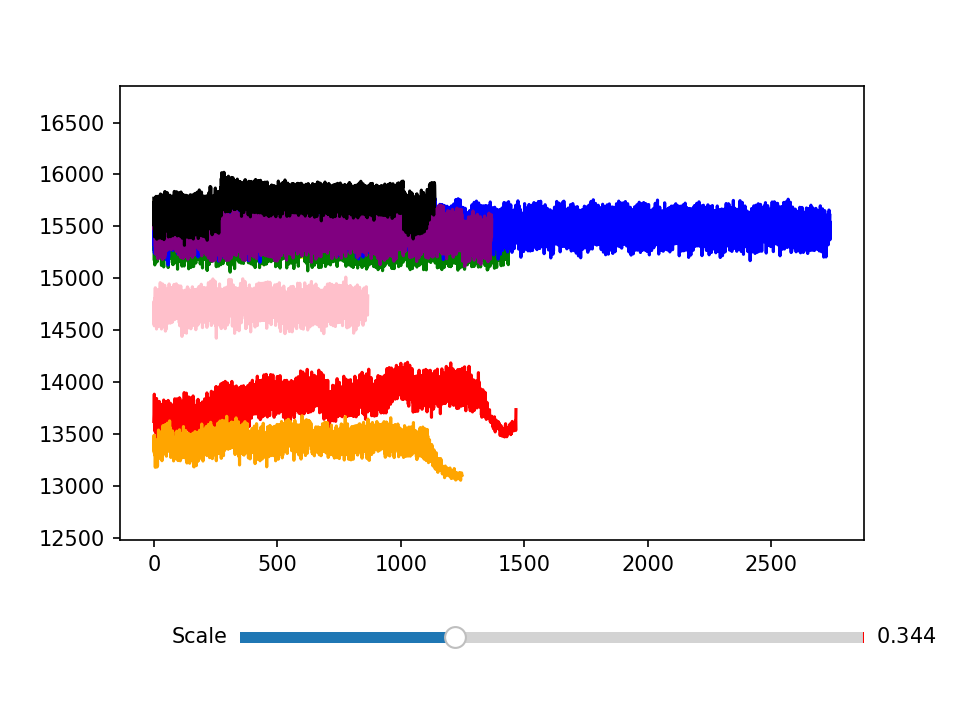

1667
1567


In [12]:
init_coeff = 1;
fig, ax = plt.subplots()
data = read_text_vals("1mm_Flat_interdigitated_BL32.txt")
data2 = read_text_vals("2mm_Flat_interdigitated_BL32.txt")
data3 = read_text_vals("4mm_Flat_interdigitated_BL32.txt")
data4 = read_text_vals("6mm_Flat_interdigitated_BL32.txt")
data5 = read_text_vals("8mm_Flat_interdigitated_BL32.txt")
data6 = read_text_vals("10mm_Flat_interdigitated_BL32.txt")
data7 = read_text_vals("12mm_Flat_interdigitated_BL32.txt")
data8 = read_text_vals("14mm_Flat_interdigitated_BL32.txt")
print(len(data))
data = data[100:]
data2 = data2[100:]
data3 = data3[100:]
data4 = data4[100:]
data5 = data5[100:]
data6 = data6[100:]
data7 = data7[100:]
data8 = data8[100:]
print(len(data))
line, = ax.plot(iir_filter(data, 1), 'red')
line2, = ax.plot(iir_filter(data2, 1), 'orange')
line3, = ax.plot(iir_filter(data3, 1), 'yellow')
line4, = ax.plot(iir_filter(data4, 1), 'green')
line5, = ax.plot(iir_filter(data5, 1), 'blue')
line6, = ax.plot(iir_filter(data6, 1), 'purple')
line7, = ax.plot(iir_filter(data7, 1), 'pink')
line8, = ax.plot(iir_filter(data8, 1), 'black')
# adjust the main plot to make room for the sliders
fig.subplots_adjust(bottom=0.25)
# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
amp_slider = Slider(
    ax=axfreq,
    label='Scale',
    valmin=0,
    valmax=1,
    valinit=init_coeff,
)

# The function to be called anytime a slider's value changes
def update(val=1):
    line.set_ydata(iir_filter(data, val))
    line2.set_ydata(iir_filter(data2, val))
    line3.set_ydata(iir_filter(data3, val))
    line4.set_ydata(iir_filter(data4, val))
    line5.set_ydata(iir_filter(data5, val))
    line6.set_ydata(iir_filter(data6, val))
    line7.set_ydata(iir_filter(data7, val))
    line8.set_ydata(iir_filter(data8, val))
    fig.canvas.draw_idle()

# register the update function with each slider
amp_slider.on_changed(update)
interact()

<IPython.core.display.Javascript object>


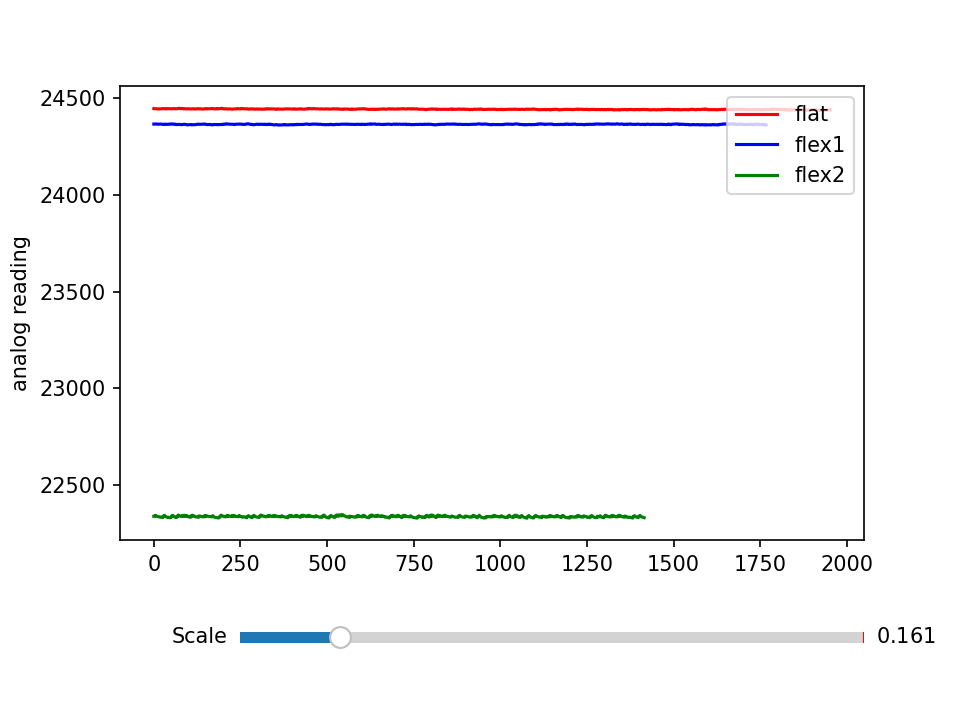

2153
2053


In [24]:
init_coeff = 1;
fig, ax = plt.subplots()
data = read_text_vals("interdigitated_BL32.txt")
data2 = read_text_vals("interdigitated2_BL32.txt")
data3 = read_text_vals("interdigitated3_BL32.txt")
print(len(data))
data = data[100:]
# data2 = data2[100:]
# data3 = data3[100:]
print(len(data))
line, = ax.plot(iir_filter(data, 1), 'red', label='flat')
line2, = ax.plot(iir_filter(data2, 1), 'blue', label='flex1')
line3, = ax.plot(iir_filter(data3, 1), 'green', label='flex2')
# adjust the main plot to make room for the sliders
fig.subplots_adjust(bottom=0.25)
plt.legend(loc="upper right")
plt.ylabel('analog reading')
# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
amp_slider = Slider(
    ax=axfreq,
    label='Scale',
    valmin=0,
    valmax=1,
    valinit=init_coeff,
)

# The function to be called anytime a slider's value changes
def update(val=1):
#     new_data = iir_filter(data, val)
# #     new_data = new_data[100:]
#     line.set_ydata(newdata)
#     new_data2 = iir_filter(data2, val)
# #     new_data2 = new_data2[100:]
#     line2.set_ydata(newdata2)
#     new_data3 = iir_filter(data3, val)
# #     new_data3 = new_data[100:]
#     line3.set_ydata(new_data3)
    line.set_ydata(iir_filter(data, val))
    line2.set_ydata(iir_filter(data2, val))
    line3.set_ydata(iir_filter(data3, val))
    
    
    fig.canvas.draw_idle()

# register the update function with each slider
amp_slider.on_changed(update)
interact()

<IPython.core.display.Javascript object>


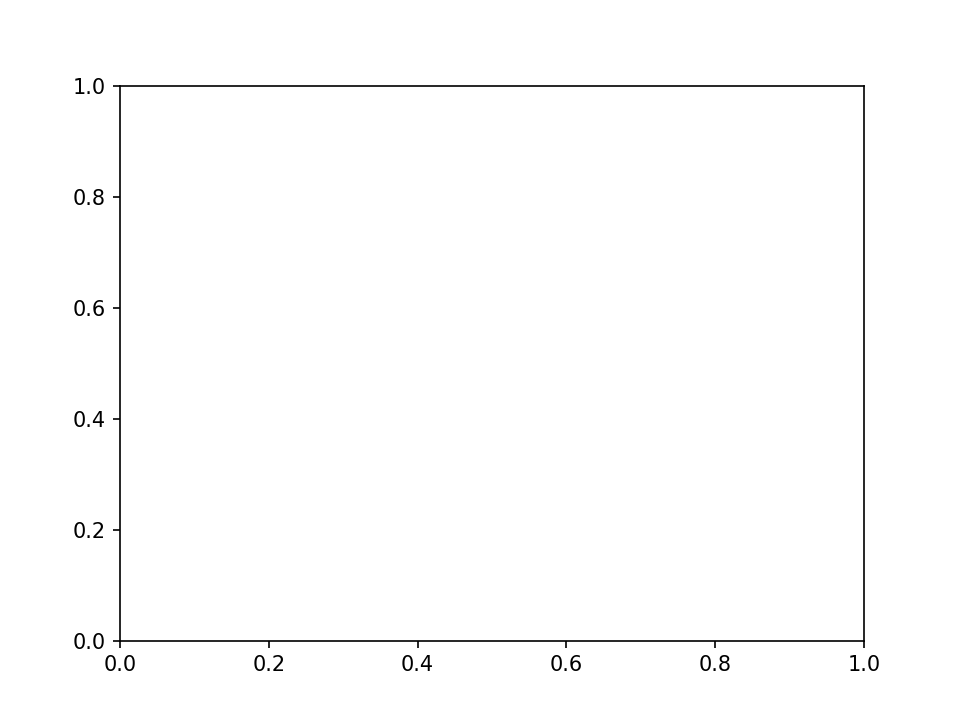

NameError: name 'read_text_vals_and_scale' is not defined

In [17]:
init_scale = 1;
fig, ax = plt.subplots()
line, = ax.plot(read_text_vals_and_scale("530controlled_amp_32BL.txt", init_scale))
# adjust the main plot to make room for the sliders
fig.subplots_adjust(bottom=0.25)
# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
amp_slider = Slider(
    ax=axfreq,
    label='Scale',
    valmin=1,
    valmax=4,
    valinit=init_scale,
)

# The function to be called anytime a slider's value changes
def update(val=1):
    line.set_ydata(read_text_vals_and_scale("530controlled_amp_32BL.txt", val))
    fig.canvas.draw_idle()

# register the update function with each slider
amp_slider.on_changed(update)
interact()


<IPython.core.display.Javascript object>


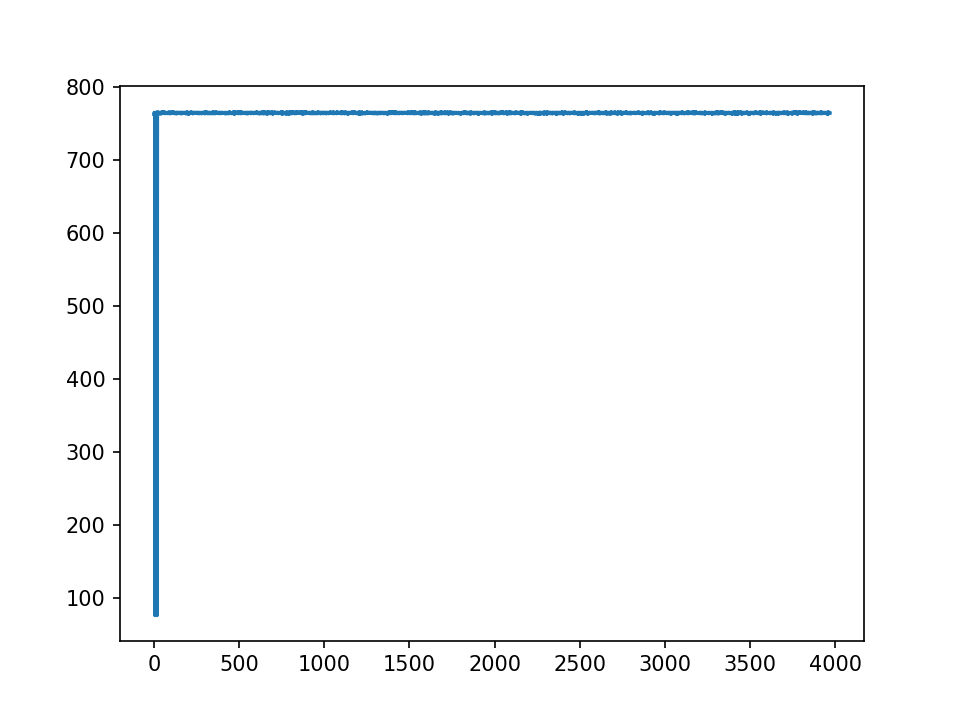

763.9052896725441


In [18]:
f = open("528_1BL2_low.txt", 'r')
lines = f.readlines()
data = []
for lin in lines:
    data.append(int(lin))
plt.figure()
plt.plot(data)
f.close()
print(np.mean(data))

<IPython.core.display.Javascript object>


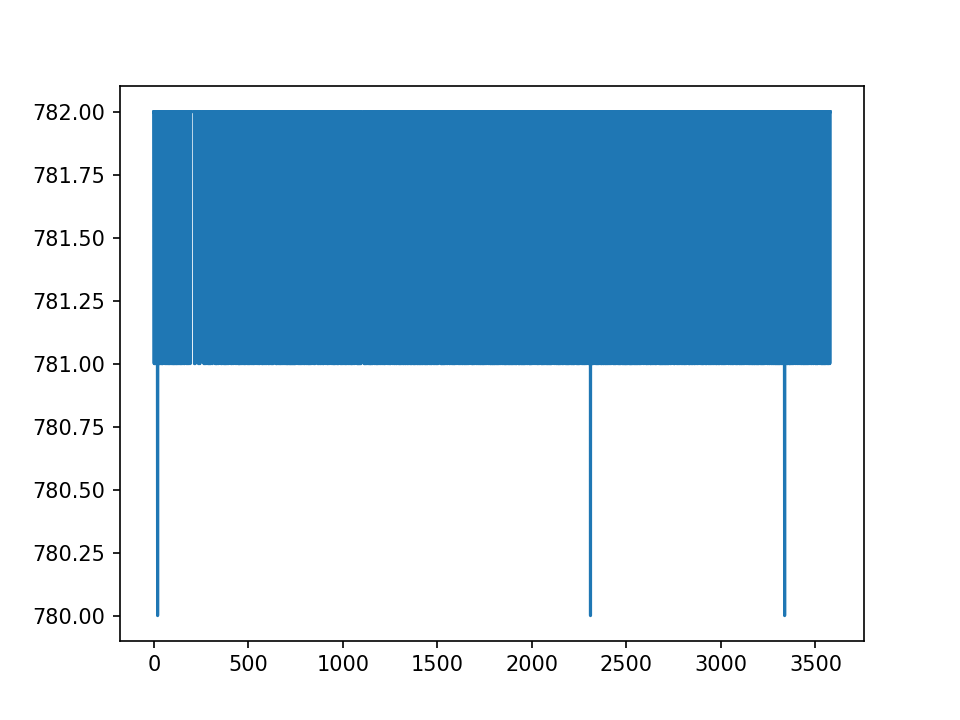

781.6797988264879


In [19]:
f = open("528_1BL3_high.txt", 'r')
lines = f.readlines()
data = []
for lin in lines:
    data.append(int(lin))
plt.figure()
plt.plot(data)
f.close()
print(np.mean(data))

In [ ]:
f = open("528_1BL2_high.txt", 'r')
lines = f.readlines()
data = []
for lin in lines:
    data.append(int(lin))
plt.figure()
plt.plot(data)
f.close()
print(np.mean(data))

<IPython.core.display.Javascript object>


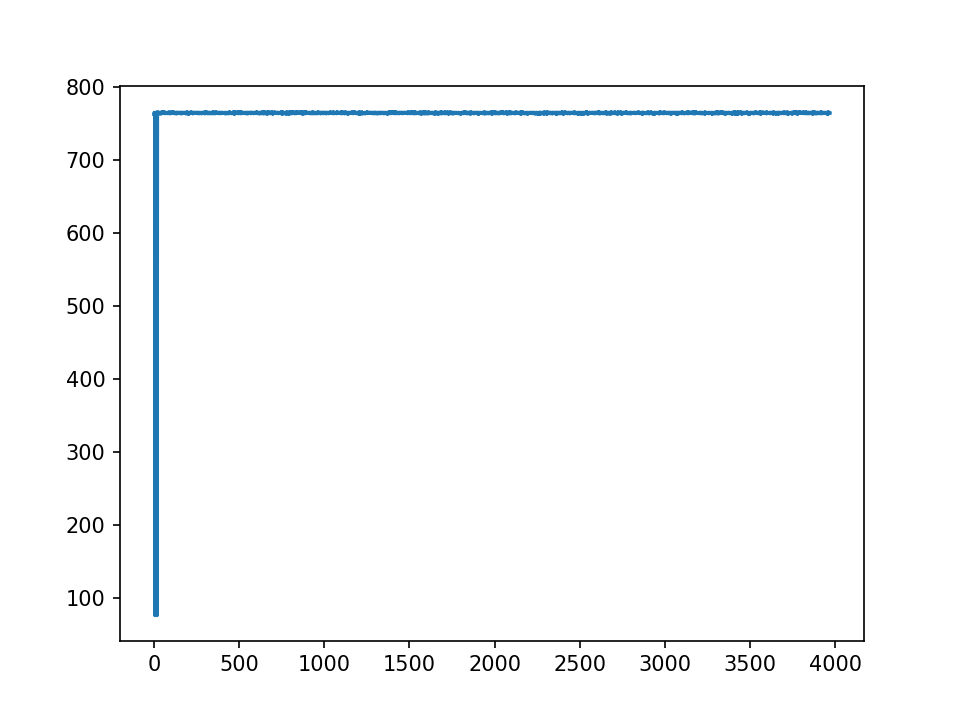

763.9052896725441


In [20]:
f = open("528_1BL2_low.txt", 'r')
lines = f.readlines()
data = []
for lin in lines:
    data.append(int(lin))
plt.figure()
plt.plot(data)
f.close()
print(np.mean(data))

In [ ]:
f = open("528_1BL_low.txt", 'r')
lines = f.readlines()
data = []
for lin in lines:
    data.append(int(lin))
plt.figure()
plt.plot(data)
f.close()
print(np.mean(data))

In [ ]:
f = open("528_1BL_high.txt", 'r')
lines = f.readlines()
data = []
for lin in lines:
    data.append(int(lin))
plt.figure()
plt.plot(data)
f.close()
print(np.mean(data))

In [21]:
def plot_exps(filenames) :
    colors = ['r', 'b', 'g', 'y', 'v']
    fouriers = []
    i = 0
    plt.figure()
    #fig, ax = plt.subplots(nrows=5, ncols=2)
    print("mean values:")
#     plt.ylim(23000, 30000)
    for fn in filenames:
        data = []
        times = []
        f = open(fn, 'r')
        lines = f.readlines()
        for line in lines:
#             datastr = line.split(' ')
#             if (len(datastr) == 2) :
#                 date = datetime.datetime.strptime(datastr[0], '%H:%M:%S.%f')
#                 times.append(date.time())
#                 data.append(int(datastr[1]))
            data.append(float(line))
        print(np.mean(data))
        plt.plot(data[100:], colors[i])
    #     ax[i, 0].plot(data, colors[i])
    #     ax[i, 1].plot(np.abs(np.fft.fft(data)), colors[i])

        f.close()
        i = i + 1

    plt.figure()
    i = 0
    for f in fouriers:
        plt.plot(np.abs(f), colors[i])
        i = i + 1


In [ ]:
#filenames = ['sensor_readings.txt', 'sensor_readings3.txt', 'sensor_readings4.txt'] #,sensor_readings5.txt']
# filenames = ['read_fixed1.txt', 'read_fixed2.txt', 'read_fixed3.txt', 'read_fixed4.txt']#, 'read_fixed4.txt', 'read_fixed5.txt'] #,sensor_readings5.txt']
#filenames = ['try1.txt', 'try2.txt', 'try3.txt', 'try4.txt']
#filenames = ['noamp_100BL.txt', 'noamp_100BL2.txt', 'noamp_100BL3.txt', 'noamp_100BL4.txt', 'noamp_100BL5.txt']
#filenames = ['noamp_200BL.txt', 'noamp_200BL2.txt', 'noamp_200BL3.txt', 'noamp_200BL4.txt']
#filenames = ['amp_16BL.txt', 'amp_16BL2.txt', 'amp_16BL3.txt', 'amp_16BL4.txt']
filenames = ['amp_32BL.txt', 'amp_32BL2.txt', 'amp_32BL3.txt', 'amp_32BL4.txt', 'amp_32BL5.txt']
#filenames = ['amp_50BL.txt', 'amp_50BL2.txt', 'amp_50BL3.txt', 'amp_50BL4.txt', 'amp_50BL5.txt']
#filenames = ['amp_8BL.txt', 'amp_8BL2.txt', 'amp_8BL3.txt', 'amp_8BL4.txt', 'amp_8BL5.txt']


In [ ]:
# plot_exps(['noamp_100BL.txt', 'noamp_100BL2.txt', 'noamp_100BL3.txt', 'noamp_100BL4.txt', 'noamp_100BL5.txt'])
# plot_exps(['noamp_200BL.txt', 'noamp_200BL2.txt', 'noamp_200BL3.txt', 'noamp_200BL4.txt'])
# plot_exps(['amp_8BL.txt', 'amp_8BL2.txt', 'amp_8BL3.txt', 'amp_8BL4.txt', 'amp_8BL5.txt'])
# plot_exps(['amp_16BL.txt', 'amp_16BL2.txt', 'amp_16BL3.txt', 'amp_16BL4.txt'])
# plot_exps(['amp_32BL.txt', 'amp_32BL2.txt', 'amp_32BL3.txt', 'amp_32BL4.txt', 'amp_32BL5.txt'])
# plot_exps(['amp_50BL.txt', 'amp_50BL2.txt', 'amp_50BL3.txt', 'amp_50BL4.txt', 'amp_50BL5.txt'])
plot_exps(['530controlled_amp_40BL.txt', '530controlled_amp_40BL2.txt', '530controlled_amp_40BL3.txt', '530controlled_amp_40BL4.txt'])
plot_exps(['530_amp_32BL.txt', '530_amp_32BL2.txt', '530_amp_32BL3.txt', '530_amp_32BL4.txt', '530_amp_32BL5.txt'])
plot_exps(['530controlled_amp_32BL.txt', '530controlled_amp_32BL2.txt', '530controlled_amp_32BL3.txt', '530controlled_amp_32BL4.txt'])#, '530controlled_amp_32BL5.txt'])
plot_exps(['530controlled_amp_16BL.txt', '530controlled_amp_16BL2.txt', '530controlled_amp_16BL3.txt', '530controlled_amp_16BL4.txt'])
plot_exps(['530controlled_amp_8BL.txt', '530controlled_amp_8BL2.txt', '530controlled_amp_8BL3.txt', '530controlled_amp_8BL4.txt'])
plot_exps(['530controlled_amp_32BL_filtered.txt', '530controlled_amp_32BL_filtered2.txt', '530controlled_amp_32BL_filtered3.txt', '530controlled_amp_32BL_filtered4.txt', '530controlled_amp_32BL_filtered5.txt'])
plot_exps(['530controlled_amp_32BL_lessfiltered.txt', '530controlled_amp_32BL_lessfiltered2.txt', '530controlled_amp_32BL_lessfiltered3.txt', '530controlled_amp_32BL_lessfiltered4.txt'])